## Support Vector Regression

SVR tries to fit as many instances as close as possible on the street while limiting margin violations. The width of this street is controlled by the hyper parameter Epsilon.
- SVR performs lin-reg in a higher dimensional space. Each data point in the training represents it's own dimension.
- When you evaluate the kernel between the test point and training point, the resulting value is the coordinate of the test point in the higher dimension.
- The vector when you evaluate the test points for all points in the training set and this is used to perform the linear regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Position_Salaries.csv")

In [3]:
X=dataset.iloc[:,1:2].values
Y=dataset.iloc[:,-1:].values

In [4]:
from sklearn.svm import SVR

In [5]:
regressor=SVR(kernel="rbf")

In [6]:
regressor.fit(X,Y)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
y_pred=regressor.predict(([[6.5]]))
y_pred

array([130001.55760156])

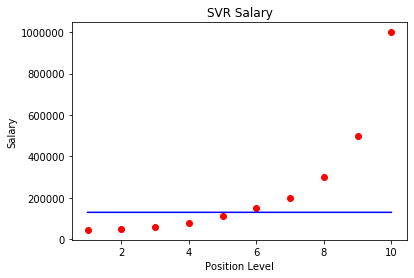

In [8]:
plt.scatter(X,Y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title("SVR Salary")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

### Scaling and Regenerate Model
SVR does not come with the scaler by default. It is necessary to scale the dataset.

In [9]:
from sklearn.preprocessing import StandardScaler
scX=StandardScaler()
scY=StandardScaler()
X=scX.fit_transform(X)
Y=scY.fit_transform(Y)
regressor.fit(X,Y)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
d=regressor.predict(scX.transform([[6.5]]))
d=scY.inverse_transform(d)
d

array([170370.0204065])

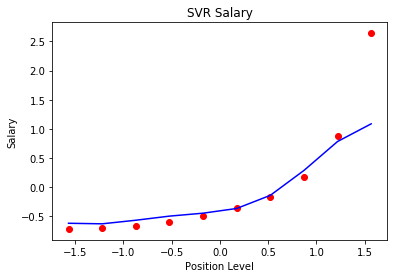

In [13]:
plt.scatter(X,Y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title("SVR Salary")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()